INTRODUCTION TO LINEAR REGRESSION

Objective:
Predict a student’s exam score using a simple Linear Regression model.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

print("All libraries imported successfully")



All libraries imported successfully


In [4]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape


(1000, 8)

In [4]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Independent variable (X): Reading Score  
Dependent variable (y): Math Score  

The reading score is used as input to predict the math score of a student using Linear Regression.


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
X = df[['reading score']]   # Independent variable
y = df['math score']        # Dependent variable

X.head(), y.head()


(   reading score
 0             72
 1             90
 2             95
 3             57
 4             78,
 0    72
 1    69
 2    90
 3    47
 4    76
 Name: math score, dtype: int64)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Data Preprocessing

The dataset was checked for missing values and none were found.
The data was then split into training (80%) and testing (20%) sets
to evaluate the performance of the Linear Regression model.


In [8]:
# Create the Linear Regression model
model = LinearRegression()

# Train the model using training data
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)


Coefficient (slope): 0.8465291474700297
Intercept: 7.6159151477220774


# Model Interpretation

The coefficient represents the change in the predicted math score
for a one-unit increase in the reading score.
This means that as the reading score increases, the math score is
expected to increase by approximately the value of the coefficient.


In [10]:
y_pred = model.predict(X_test)


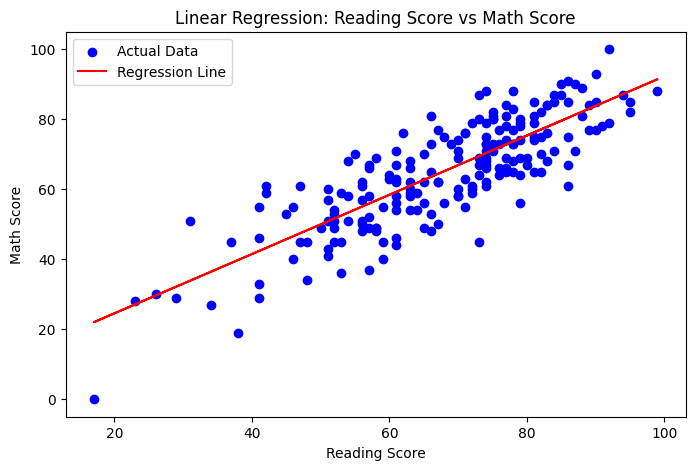

In [11]:
plt.figure(figsize=(8, 5))

# Scatter plot of actual data
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.title("Linear Regression: Reading Score vs Math Score")
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Absolute Error (MAE): 7.280881770618453
R² Score: 0.6804469009921285


# Model Evaluation

The Mean Absolute Error (MAE) indicates the average difference between
the predicted and actual math scores.

The R² score shows how well the model explains the variance in the data.
A reasonably high R² value suggests that the Linear Regression model
performs well for predicting math scores based on reading scores.
